In [1]:
%matplotlib inline

In [2]:
import MySQLdb as mdb

con = mdb.connect(host = 'localhost', 
                  user = 'root', 
                  passwd = 'dwdstudent2015', 
                  charset='utf8', use_unicode=True, database='citibike');

In [3]:
query = '''
SELECT station_id AS id, 
       AVG(available_bikes/(available_bikes+available_docks)) AS perc, 
       CONCAT(DATE(last_communication_time), ' ',  SEC_TO_TIME((TIME_TO_SEC(last_communication_time) DIV 900) * 900)) AS time  

FROM citibike.Docks_Status

WHERE last_communication_time > '2017-01-30' AND last_communication_time < '2017-02-09'
    AND status_key=1 
    AND available_bikes+available_docks>0

GROUP BY station_id, time
'''

In [4]:
import pandas as pd

cur = con.cursor(mdb.cursors.DictCursor)
cur.execute(query)
df = pd.DataFrame(list(cur.fetchall()))
cur.close()
con.close()
df['perc'] = df['perc'].astype(float)
df['time'] = pd.to_datetime(df['time'])


In [5]:
df.groupby('time').mean()

,id,perc
time,,
2017-01-31 00:00:00,1937.745736,0.343861
2017-01-31 00:15:00,1937.745736,0.343910
2017-01-31 00:30:00,1937.745736,0.344176
2017-01-31 00:45:00,1935.940994,0.344604
2017-01-31 01:00:00,1931.848910,0.345135
2017-01-31 01:15:00,1935.940994,0.344665
2017-01-31 01:30:00,1935.412131,0.345701
2017-01-31 01:45:00,1937.616460,0.345210
2017-01-31 02:00:00,1935.808709,0.344901


In [6]:
df.groupby('time').mean()['perc']

time
2017-01-31 00:00:00    0.343861
2017-01-31 00:15:00    0.343910
2017-01-31 00:30:00    0.344176
2017-01-31 00:45:00    0.344604
2017-01-31 01:00:00    0.345135
2017-01-31 01:15:00    0.344665
2017-01-31 01:30:00    0.345701
2017-01-31 01:45:00    0.345210
2017-01-31 02:00:00    0.344901
2017-01-31 02:15:00    0.344095
2017-01-31 02:30:00    0.343533
2017-01-31 02:45:00    0.343069
2017-01-31 03:00:00    0.343198
2017-01-31 03:15:00    0.343793
2017-01-31 03:30:00    0.344238
2017-01-31 03:45:00    0.344869
2017-01-31 04:00:00    0.344805
2017-01-31 04:15:00    0.344496
2017-01-31 04:30:00    0.344137
2017-01-31 04:45:00    0.343227
2017-01-31 05:00:00    0.342791
2017-01-31 05:15:00    0.341878
2017-01-31 05:30:00    0.340596
2017-01-31 05:45:00    0.340846
2017-01-31 06:00:00    0.340695
2017-01-31 06:15:00    0.339671
2017-01-31 06:30:00    0.338869
2017-01-31 06:45:00    0.336177
2017-01-31 07:00:00    0.334969
2017-01-31 07:15:00    0.331332
                         ...   
201

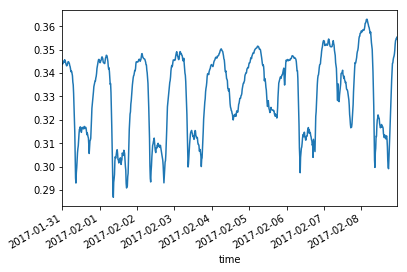

In [7]:
df.groupby('time').mean()['perc'].plot()

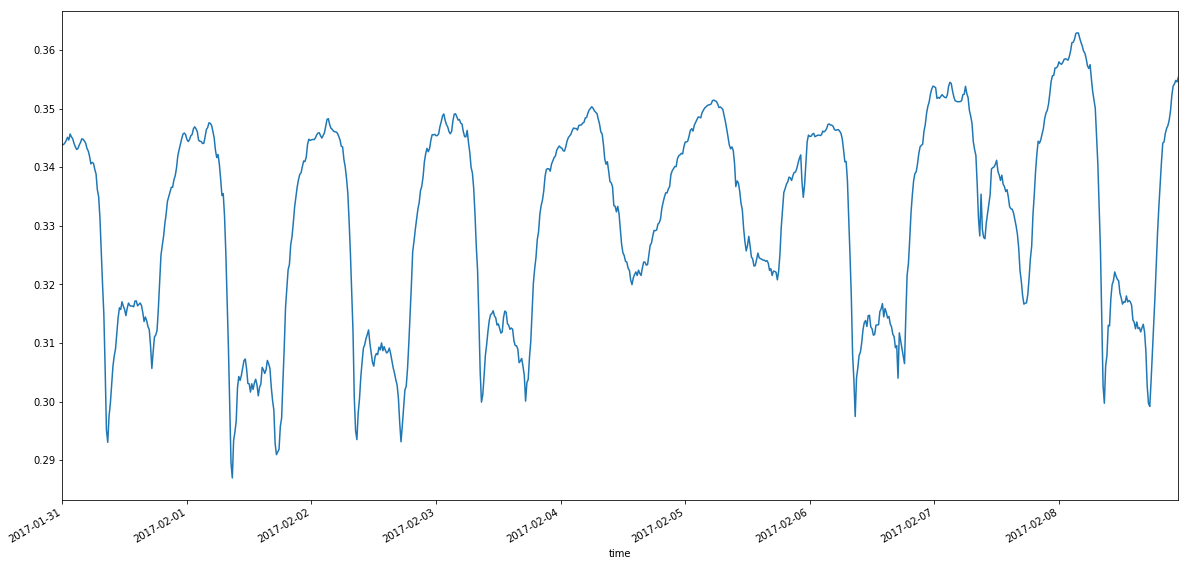

In [8]:
df.groupby('time').mean()['perc'].plot(figsize=(20,10))

In [9]:
import numpy as np
df2 = df.pivot_table(index='time', columns='id', values='perc', aggfunc=np.mean).fillna(method='pad')


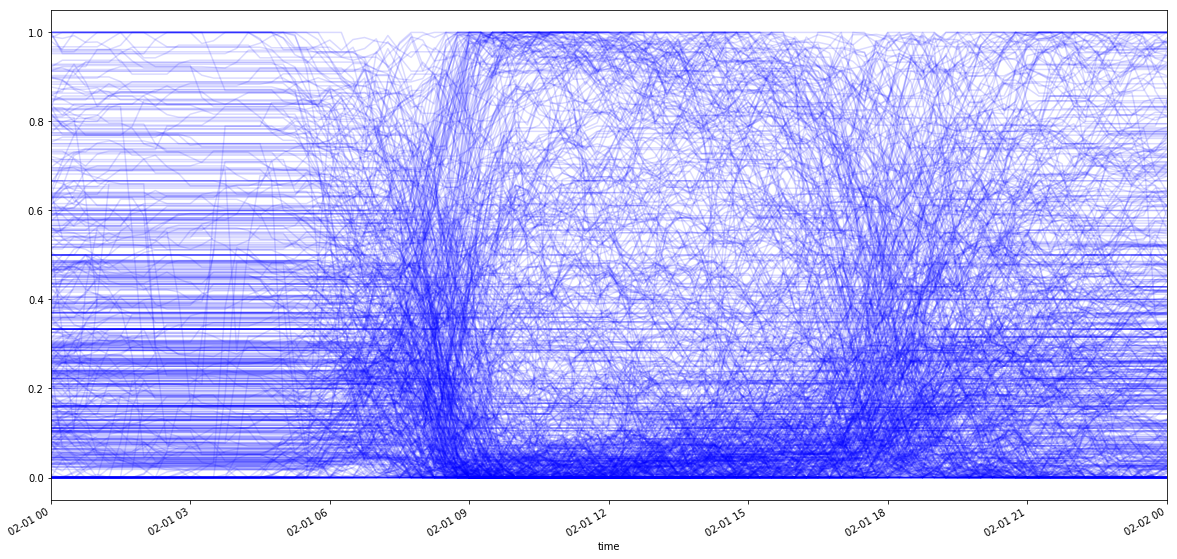

In [10]:
df2.plot(
    alpha=0.15, 
    color='b', 
    legend=False, 
    figsize=(20,10), 
    xlim=('2017-02-01','2017-02-02')
)

In [11]:
# df_empty_morning = df2[df2.columns[df2.iloc[0]<0.1]]
# df_empty_morning.plot(alpha=0.1, color='b',legend=False, figsize=(20,10))

In [12]:
# df_full_midnight = df2[df2.columns[df2.iloc[0]>0.9]]
# df_full_midnight.plot(alpha=0.1, color='b',legend=False, figsize=(20,10))

In [13]:
similarities = df2.corr(method='pearson')
distances = ((.5*(1-similarities))**2)
distances

id,72,79,82,83,116,119,120,127,128,143,...,3430,3431,3434,3435,3436,3438,3440,3443,3445,3447
id,,,,,,,,,,,,,,,,,,,,,
72,0.000000,0.362601,0.178868,0.157593,0.449168,0.237480,0.187373,0.268830,0.339817,0.177175,...,0.203900,0.286873,0.190629,0.252913,0.139214,0.331665,0.176316,0.189895,0.075415,0.412128
79,0.362601,0.000000,0.626539,0.352578,0.326953,0.591691,0.679320,0.449904,0.033261,0.148084,...,0.550519,0.242386,0.546737,0.128343,0.187760,0.239427,0.102171,0.141468,0.724598,0.081653
82,0.178868,0.626539,0.000000,0.326144,0.131843,0.081297,0.040547,0.048572,0.498883,0.172920,...,0.169945,0.365036,0.078430,0.315733,0.243389,0.343980,0.370402,0.346967,0.032239,0.282999
83,0.157593,0.352578,0.326144,0.000000,0.262423,0.194239,0.320490,0.474906,0.320320,0.401055,...,0.321505,0.259229,0.378815,0.408607,0.170549,0.226217,0.109815,0.170641,0.141105,0.647419
116,0.449168,0.326953,0.131843,0.262423,0.000000,0.081354,0.219213,0.107862,0.206506,0.170978,...,0.466796,0.509324,0.312045,0.155594,0.124504,0.346781,0.131311,0.188131,0.185354,0.304254
119,0.237480,0.591691,0.081297,0.194239,0.081354,0.000000,0.039925,0.070322,0.520321,0.324936,...,0.190597,0.477304,0.059624,0.474549,0.244266,0.316119,0.301873,0.274069,0.045345,0.457966
120,0.187373,0.679320,0.040547,0.320490,0.219213,0.039925,0.000000,0.036731,0.727652,0.396162,...,0.055483,0.310914,0.007233,0.368969,0.469207,0.302816,0.523147,0.517355,0.033308,0.361631
127,0.268830,0.449904,0.048572,0.474906,0.107862,0.070322,0.036731,0.000000,0.464478,0.258687,...,0.179055,0.555360,0.059805,0.238055,0.260875,0.499632,0.286709,0.328757,0.069350,0.321081
128,0.339817,0.033261,0.498883,0.320320,0.206506,0.520321,0.727652,0.464478,0.000000,0.134869,...,0.617278,0.278008,0.623634,0.151757,0.129830,0.247439,0.094819,0.121788,0.600565,0.087741


In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, linkage='average')
cluster.fit(distances.values)
colors = list(['r','b', 'g', 'm', 'y', 'k', 'w', 'c'])

In [15]:
# Associate each data point with a cluster
labels = pd.DataFrame(list(zip(distances.index.values.tolist(), cluster.labels_)), columns = ["id", "cluster"])
labels.set_index("id", inplace=True)
# Assign a color to each cluster, so that we can plot each station-timeline with the cluster color
labels['color'] = labels['cluster'].apply(lambda x : colors[x])

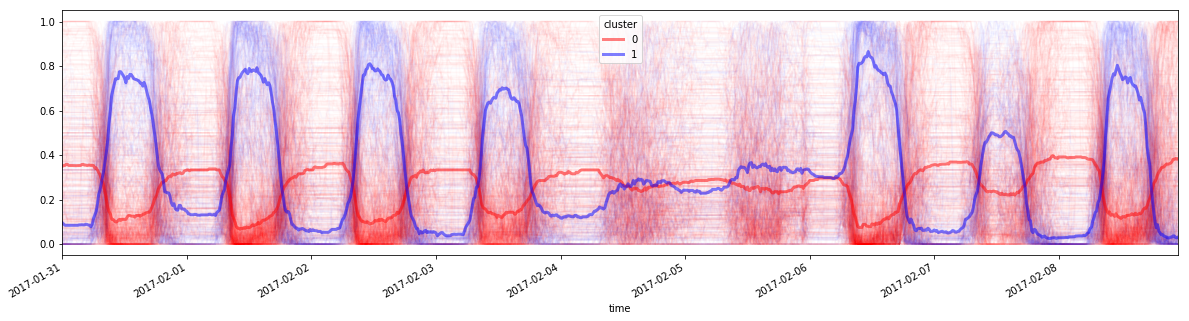

In [16]:
ax = df2.plot(alpha=0.02, legend=False, figsize=(20,5), color=labels["color"])
agg = df.set_index("time").groupby(["id", pd.TimeGrouper("15T")]).mean().join(labels, how='inner')
result = pd.DataFrame(agg.to_records())
import numpy as np

t = result.pivot_table(
        index='time', 
        columns='cluster', 
        values='perc', 
        aggfunc=lambda x: np.percentile(x, 50)
    ).plot(
        figsize=(20,5), 
        linewidth = 3, 
        alpha = 0.5,
        color=colors, 
        ax = ax
    )

